# **PROJECT :** Dự đoán giá bơ tại Mĩ

**Vấn đề của doanh nghiệp :**
 - Bơ "Hass", một công ty có trụ sở tại Mexico, chuyên sản xuất nhiều loại bơ được bán ở Mỹ. Họ đã rất thành công trong những năm gần đây và muốn mở rộng. Vì vậy, họ muốn xây dựng mô hình hợp lý để dự đoán giá trung bình của bơ "Hass" ở Mỹ nhằm xem xét việc mở rộng các loại trang trại bơ cho việc trồng bơ ở các vùng khác.

**Triển khai dự án :**

**Hiểu rõ vấn đề **

 - Hiện tại : Công ty kinh doanh bơ ở rất nhiều vùng của nước Mỹ với 2 loại bơ là bơ thường và bơ hữu cơ, được đóng gói theo nhiều quy chuẩn (Small/Large/XLarge bags), và có 3 loại PLU (Production look up) khác nhau là : 4046,4225,4770).Nhưng họ chưa có mô hình để dự đoán giá bơ cho việc mở rộng.
 
- Mục tiêu/vấn đề : Xây dựng mô hình dư đoán giá trung bình của bơ "Hass" ở Mỹ => Xem xét việc mở rộng sản xuất và kinh doanh.

**Hiểu về dữ liệu**

 - Dự liệu được lấy trực tiếp từ máy tính tiền của các nhà bán lẻ dựa trên doanh số bán lẻ thực tế của bơ "Hass".


- Dữ liệu đại diện cho dữ liệu lấy từ máy quét bán lẻ hàng tuần cho lượng bán lẻ và giá bơ từ tháng 4/20215 đến tháng 3/2018.

- Giá trung bình tổng phản ánh giá bán lẻ và bán sỉ.

- Mã tra cứu sản phẩm trong bảng chỉ dành cho bơ Hass, không dành cho sản phẩm khác.

**Toàn bộ dữ liệu được đổ ra và lưu trữ trong tập tin avocado.csv với 18249 records. Với các cột** :

- Date : Ngày ghi nhận

- AveragePrice : Giá trung bình của 1 quả bơ

- Type : 2 loại bơ conventional / organic (Thông thường/hữu cơ)

- Region : Vùng được bán

- Total volume : Tổng số bơ đã bán
- 4046 : Tổng số bơ có mã PLU 4046 đã bán
- 4225 : Tổng số bơ có mã PLU 4225 đã bán
- 4770 : tổng số bơ có mã PLU 4770 đã bán
- Total bags : Tổng số túi đã bán
- Small/Large/XLarge Bags : tổng số túi đã bán theo size

Có hai loại bơ trong tập dữ liệu và một số vùng khác nhau. Điều này cho phép chúng ta thực thiện tất cả các loại phân tích cho các vùng khác nhau, hoặc phân tích toàn bộ nước Mỹ theo một trong hai loại bơ.

# **=> Có thể tập trung giải quyết hai bài toán :**
- **Bài toán 1 :** Dự đoán giá bơ tại Mỹ theo điều kiện (loại bơ, mùa,    khu vực,...)  - Sử dụng các thuật toán Regression như Linear Regression, Random Forest,XGB Regressor,...
- **Bài toán 2 :** Dự đoán giá trung bình của 2 loại bơ (organic và conventional) trong tương lai theo từng bang ( chọn California làm đại diện )- Sử dụng các thuật toán Time Series như ARIMA, Prophet.

**Chuẩn bị dữ liệu**


In [1]:
!pip install fbprophet

In [2]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 36.0 MB/s 
     |████████████████████████████████| 675 kB 23.1 MB/s 
     |████████████████████████████████| 4.7 MB 24.5 MB/s 
     |████████████████████████████████| 58 kB 6.3 MB/s 
     |████████████████████████████████| 812 kB 63.9 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=03f12cd52a0397649b0e6bd04d7e1a93b2f7c42794b1c149fcbc4467bb3bba6a
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=b6c8012f40182572e399b490475b5045bdf0c9432b4e5fed0d4ada6a0d98a4cf
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [3]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 26.2 MB/s 
     |████████████████████████████████| 9.8 MB 34.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
!pip install xgboost

In [5]:
#cài đặt thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import pandas_profiling as pp

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [6]:
# cài đặt đường dẫn cho dataset
from google.colab import drive
drive.mount("/content/gdrive",force_remount = True)
%cd'/content/gdrive/My Drive/Avocado_PPP/'

Mounted at /content/gdrive
/content/gdrive/My Drive/Avocado_PPP


In [7]:
#import dataset
data = pd.read_csv('avocado.csv')

In [8]:
#cái nhìn tổng quan về data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
# Loại bỏ các cột không cần thiết
data = data.loc[:,~data.columns.str.contains('^Unnamed')] 

In [11]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
#Có cái nhìn tổng quan về dữ liệu, kiểm tra missing value, độ liên quan,v..v..
pp.ProfileReport(data) 

Output hidden; open in https://colab.research.google.com to view.

# **Bài toán 1** : Dự đoán giá quả bơ

Các thuật toán áp dụng : Linear regression, Random Forest, XGB Regressor - Regression Algorithm

In [13]:
#sử dụng bản copy để thao tác không ảnh hưởng đến dữ liệu gốc
df = data.copy(deep = True)

Kiểm tra độ ảnh hưởng của 'Type' (loại bơ) đến 'AveragePrice' (giá trung bình)

<function matplotlib.pyplot.show>

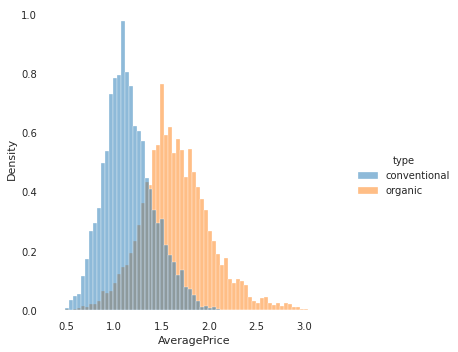

In [14]:
#Vẽ biểu đồ displot 
sns.displot(df,x = 'AveragePrice',hue='type',stat = 'density')
plt.show

Nhận xét : 'Type' ảnh hưởng tới 'AveragePrice'

In [15]:
#Vẽ boxplot mô tả 'AveragePrice' của mỗi loại bơ

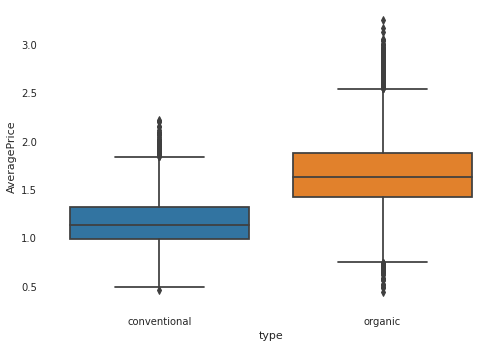

In [16]:
sns.boxplot(data = df, x='type',y='AveragePrice')
plt.show()

Nhận xét : Giá trung bình của bơ organic cao hơn conventional

Có outlier, có thể bỏ qua nếu sử dụng các thuật toán không bị ảnh hưởng bởi outlier

In [17]:
df.shape

(18249, 13)

In [18]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


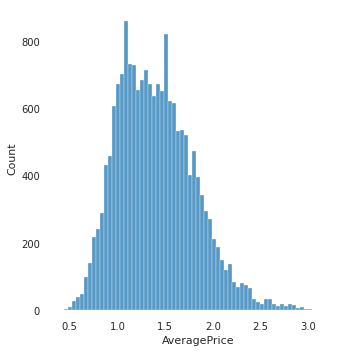

In [19]:
sns.displot(data = df, x='AveragePrice')
plt.show()

Kiểm tra độ ảnh hưởng của 'region' (vùng) đến 'AveragePrice' (giá trung bình)

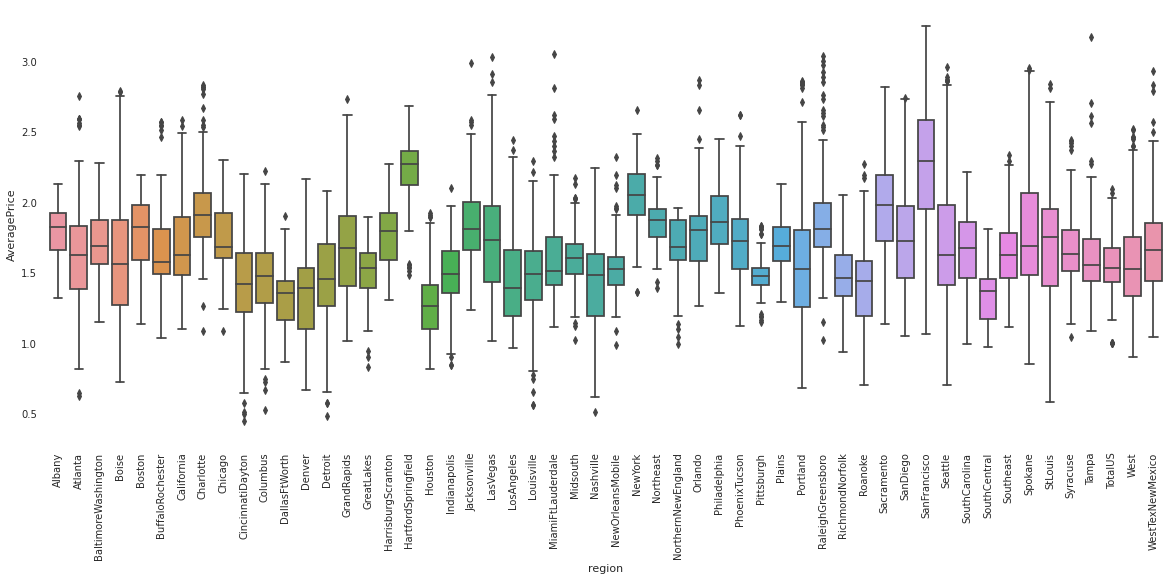

In [20]:
# Bơ organic
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data = df[df['type']=='organic'],x = 'region',y='AveragePrice',ax= ax)
plt.xticks(rotation = 90)
plt.show()

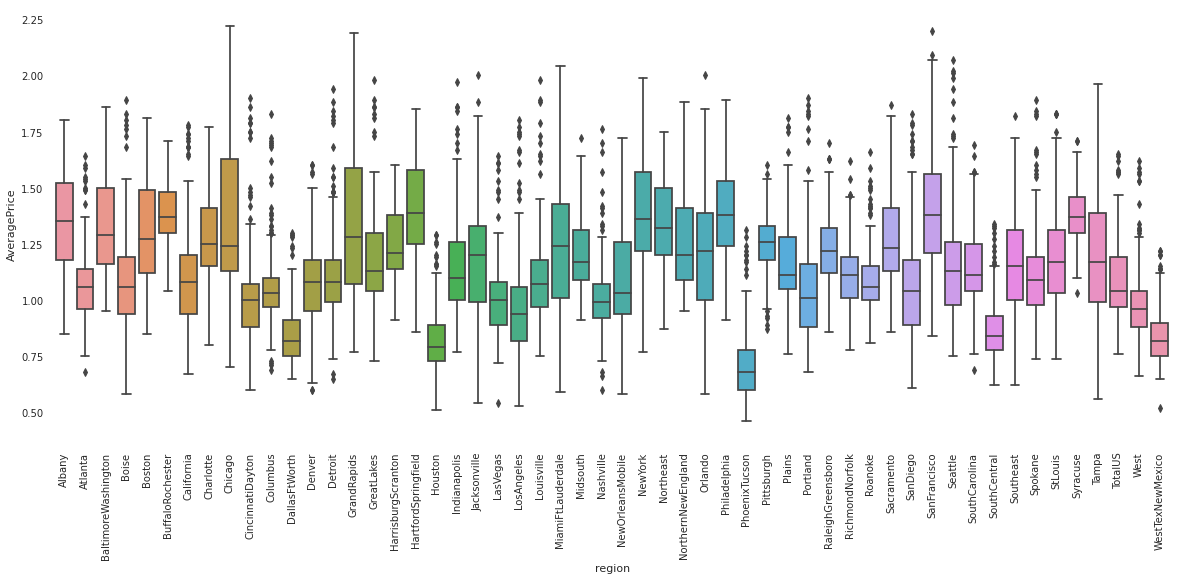

In [21]:
# Bơ conventional
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data = df[df['type']=='conventional'],x = 'region',y='AveragePrice',ax= ax)
plt.xticks(rotation = 90)
plt.show()

=> Kết luận :  'AveragePrice' bị ảnh hưởng bởi 'region'

Kiểm tra độ tương quan của các thuộc tính liên tục

In [22]:
corr = df.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


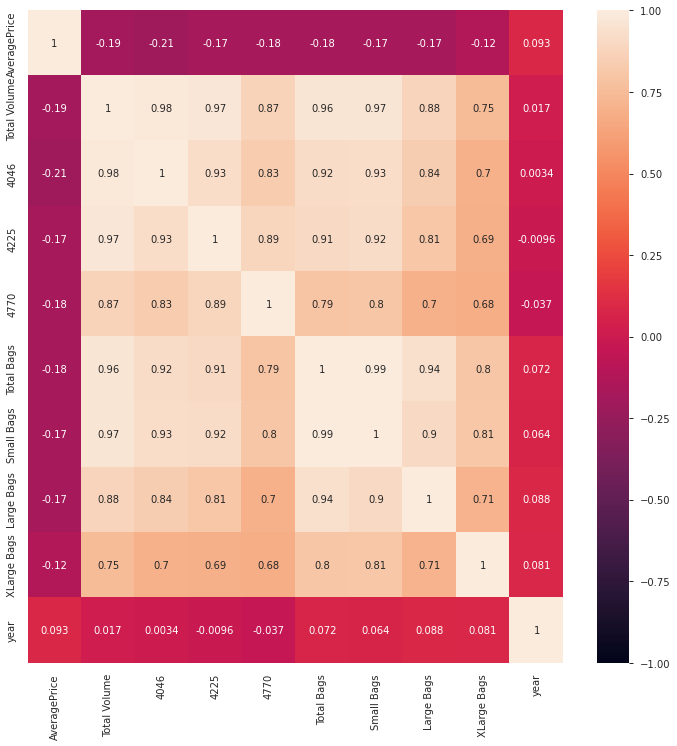

In [23]:
#Trực quan hóa độ tương quan bằng heatmap
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)
plt.show()  

Check Data

Từ Pandas profiling report ta có thể thấy : Không có dòng bị trùng, không có những ô bị thiếu dữ liệu

Kiểm tra lại

In [24]:
df.isnull().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [25]:
df.isna().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [26]:
df.duplicated().any()

False

In [27]:
df.shape

(18249, 13)

In [28]:
df = df.drop_duplicates()
df.shape

(18249, 13)

Shape trước và sau khi drop duplicates không đổi => không có dòng bị trùng

'Date' : Có quá nhiều giá trị, nên bin thành 4 mùa


Theo thông tin từ trang  https://seasonsyear.com/USA ta chia thành 4 mùa
- Xuân : Tháng 3,4,5
- Hạ : Tháng 6,7,8
-Thu : Tháng 9,10,11
-Đông : Tháng 12,1,2

In [29]:
#chia mùa thành các giá trị tương ứng từ 0 đến 3
def convert_month(month):
  if month == 3 or month == 4 or month == 5 :
    return 0
  elif month == 6 or month == 7 or month == 8 :
    return 1
  elif month == 9 or month == 10 or month == 11 :
    return 2
  else:
    return 3

In [30]:
#Chuyển cột Date từ kiểu chuỗi sang datetime
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
#Tạo cột Month mới
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [32]:
#Tạo cột season từ cột month và hàm convert_month
df['Season'] = df['Month'].apply(lambda x: convert_month(x))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Season        18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

In [34]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,3
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,3
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,3
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,3
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2


Kiểm tra sự ảnh hưởng của 'Season' đến 'AveragePrice'

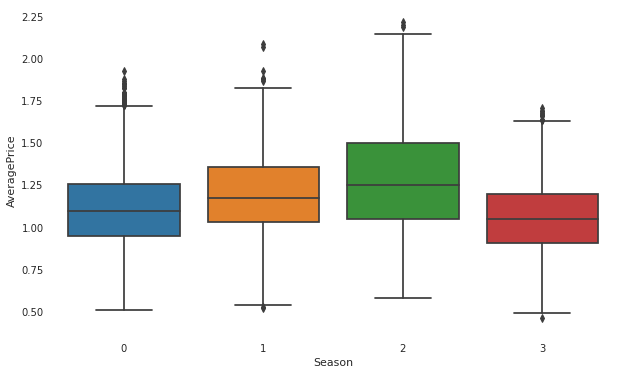

In [51]:
#Loại bơ 'conventional'
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data= df[df['type'] == 'conventional'], x = 'Season',y = 'AveragePrice', ax = ax)
plt.show()

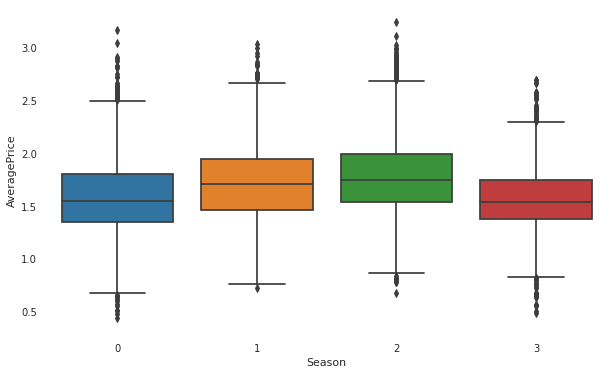

In [52]:
#Loại bơ 'organic'
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data= df[df['type'] == 'organic'], x = 'Season',y = 'AveragePrice', ax = ax)
plt.show()

=> 'AveragePrice' bị ảnh hưởng bởi 'Season' : Giá cao nhất vào mùa thu, thấp nhất vào mùa đông cho cả 2 loại bơ

Sử dụng Label Ecoder và Onehot Encoder cho 'type' và 'region'


In [37]:
le = LabelEncoder()
df['type_new'] = le.fit_transform(df['type'])

In [38]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Season,type_new
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,3,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,3,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,3,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,3,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2,0


In [39]:
df_ohe = pd.get_dummies(data = df, columns=['region'])
df_ohe.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Season,type_new,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,11,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
#Chọn giữ lại 'TotalVolume' vì nó có độ tương quan cao với các cột '4046','4225','4770','Small Bags', 'Large Bags', 'XLarge Bags'
X = df_ohe.drop(['Date','AveragePrice','type','4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis =1)
y = df['AveragePrice']

In [41]:
X.head()

,Total Volume,Total Bags,year,Month,Season,type_new,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,64236.62,8696.87,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,54876.98,9505.56,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,118220.22,8145.35,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,78992.15,5811.16,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,51039.60,6183.95,2015,11,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Modeling & đánh giá / Phân tích & báo cáo**

In [42]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [43]:
# Phương sai lớn => Chuẩn hóa (khoảng 18k mẫu => nhiều mẫu) -> Standard Scaler

In [44]:
# Thử với LinearRegression
pipe_LR = Pipeline([('scaler',StandardScaler()),('lr',LinearRegression())])
pipe_LR.fit(X_train,y_train)
y_pred_LR = pipe_LR.predict(X_test)
r2_score(y_test,y_pred_LR) #tính r^2

0.5819622411510237

In [45]:
#Tính mean absolute error (MAE)
mae_LR = mean_absolute_error(y_test,y_pred_LR)
mae_LR

0.19675179948060784

In [46]:
#Thử với RandomForestRegressor
pipe_RF = Pipeline([('scaler',StandardScaler()),('rf',RandomForestRegressor())])
pipe_RF.fit(X_train,y_train)
y_pred_RF = pipe_RF.predict(X_test)
r2_score(y_test,y_pred_RF)

0.8969868980664056

In [47]:
#Tính mean absolute error (MAE)
mae_RF = mean_absolute_error(y_test,y_pred_RF)
mae_RF

0.08850171689497716

In [48]:
#Thử với XGBRegressor
pipe_XGB = Pipeline([('scaler',StandardScaler()),('xgb',XGBRegressor())])
pipe_XGB.fit(X_train,y_train)
y_pred_XGB = pipe_XGB.predict(X_test)
r2_score(y_test,y_pred_XGB)

[08:25:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7008999415308614

In [49]:
#Tính mean absolute error (MAE)
mae_XGB = mean_absolute_error(y_test,y_pred_XGB)
mae_XGB

0.16648036149212214

In [50]:
#Tìm các feature quan trọng
feature_importances = pd.DataFrame(pipe_RF['rf'].feature_importances_,
                                   index = X_train.columns,
                                   columns= ['feature_importances']).sort_values(by=['feature_importances'],
                                                                                 ascending = False)
feature_importances

,feature_importances
type_new,0.382175
Total Bags,0.113974
Total Volume,0.083892
year,0.071644
Month,0.069188
Season,0.029998
region_HartfordSpringfield,0.024119
region_NewYork,0.021692
region_SanFrancisco,0.018999
region_Northeast,0.012578


Những feature quan trọng nhất : type_new, Total Bags,total volume (total 0~58)

Có thể xem xét bỏ bớt 1 số thuộc tính không quan trọng

# **Kết luận : Chọn RandomForestRegressor cho bài toán 1 vì có r^2 cao nhất và Mae thấp nhất**

# **Bài toán 2 : Dự đoán giá bơ trong tương lai** : Vùng California

ARIMA & PROPHET - Time Series Algorithm

In [ ]:
# tạo dataframe mới từ dataframe gốc
df_ca = data[data['region']== 'California']
df_ca['Date'] = df_ca['Date'].str[:-3] #Chỉ quan tâm năm - tháng, bỏ ngày trong cột 'Date'
df_ca = df_ca[df_ca['type'] == 'organic']
df_ca.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9438,2015-12,1.45,98576.63,14306.68,50893.97,0.00,33375.98,29507.45,3868.53,0.0,organic,2015,California
9439,2015-12,1.35,99793.55,12746.47,48195.95,1.52,38849.61,25535.80,13313.81,0.0,organic,2015,California
9440,2015-12,1.39,98605.40,13609.24,46518.56,3.05,38474.55,24359.79,14114.76,0.0,organic,2015,California
9441,2015-12,1.48,91211.53,17839.96,47527.65,1.53,25842.39,25661.06,181.33,0.0,organic,2015,California
9442,2015-11,1.75,83415.54,13195.19,48229.29,0.00,21991.06,21671.70,319.36,0.0,organic,2015,California


In [ ]:
df_ca.shape

(169, 13)

In [ ]:
# Dữ liệu 'Date' đang lấy theo tuần, groupby lại theo tháng
agg = {'AveragePrice':'mean'}
df_ca_gr = df_ca.groupby(df_ca['Date']).aggregate(agg).reset_index()
df_ca_gr.head()

,Date,AveragePrice
0,2015-01,1.2200
1,2015-02,1.3475
2,2015-03,1.3960
3,2015-04,1.5100
4,2015-05,1.4740


In [ ]:
df_ts = pd.DataFrame()
df_ts['ds'] = pd.to_datetime(df_ca_gr['Date'])
df_ts['y'] = df_ca_gr['AveragePrice']
df_ts.head()

,ds,y
0,2015-01-01,1.2200
1,2015-02-01,1.3475
2,2015-03-01,1.3960
3,2015-04-01,1.5100
4,2015-05-01,1.4740


In [ ]:
df_ts.tail()

,ds,y
34,2017-11-01,1.9325
35,2017-12-01,1.7960
36,2018-01-01,1.7800
37,2018-02-01,1.8000
38,2018-03-01,1.6500


In [ ]:
df_ts.shape

(39, 2)

In [ ]:
# Giá trung bình của bơ organic tại Cali
df_ts['y'].mean()

1.6847820512820515

# **Xử lý bài toán với ARIMA**

In [ ]:
df_ts1 = df_ts.copy(deep = True)

In [ ]:
 #Chuyển ds về datetime và dùng làm index
 df_ts1.index = pd.to_datetime(df_ts1.ds)

In [ ]:
df_ts1.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01'],
              dtype='datetime64[ns]', name='ds', freq=None)

In [ ]:
 df_ts1.head()

,ds,y
ds,,
2015-01-01,2015-01-01,1.2200
2015-02-01,2015-02-01,1.3475
2015-03-01,2015-03-01,1.3960
2015-04-01,2015-04-01,1.5100
2015-05-01,2015-05-01,1.4740


In [ ]:
#Bỏ cột ds bị thừa đi sau khi có index mới
df_ts1 = df_ts1.drop(['ds'],axis = 1)

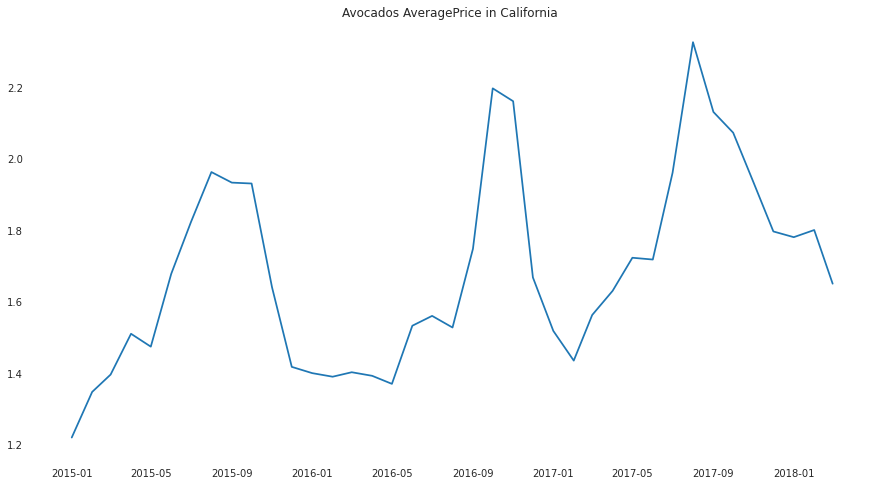

In [ ]:
#Trực quan hóa
plt.figure(figsize = (15,8))
plt.plot(df_ts1)
plt.title ('Avocados AveragePrice in California ')
plt.show()

In [ ]:
decompose_result = seasonal_decompose(df_ts1,model = 'mutiplicative')
decompose_result

<Figure size 1080x288 with 0 Axes>

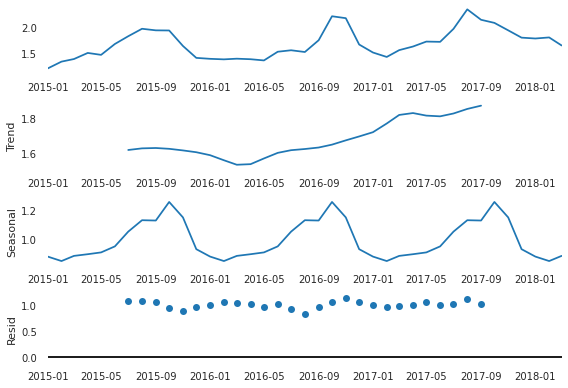

In [ ]:
plt.figure(figsize=(15,4))
decompose_result.plot()
plt.show()

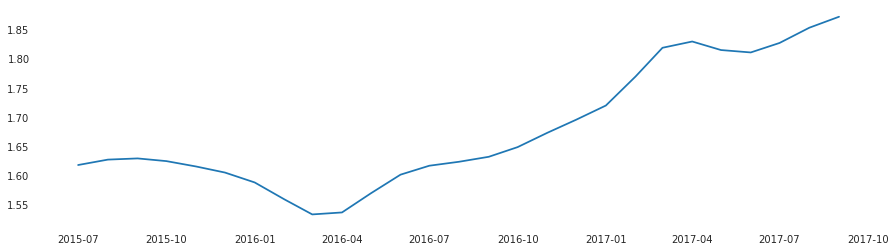

In [ ]:
plt.figure(figsize= (15,4))
plt.plot(decompose_result.trend)
plt.show()

Trend phi tuyến, có lúc giảm tại tháng 4-2016, sau đó tăng lại

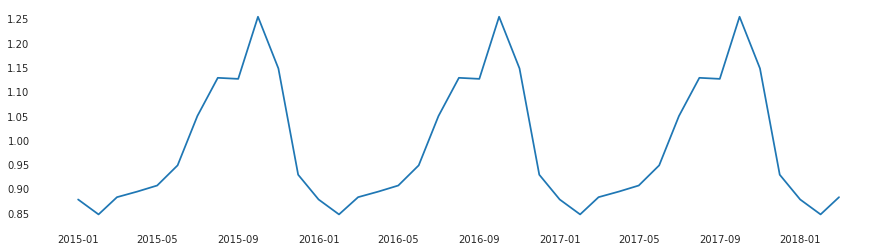

In [ ]:
plt.figure(figsize= (15,4))
plt.plot(decompose_result.seasonal)
plt.show()

Có yếu tố theo mùa.Giá bơ cao nhất vào khoảng tháng 9-10 (mùa thu) và thấp nhất vào tháng 1-2 (mùa đông)

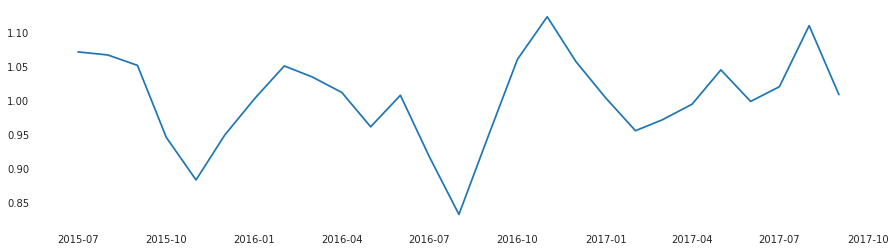

In [ ]:
plt.figure(figsize= (15,4))
plt.plot(decompose_result.resid)
plt.show()

Giá trị residual dao động từ 0.85 đến 1.15

# **Modeling & Đánh giá**

ARIMA

In [ ]:
stepwise_model = auto_arima(df_ts1,start_p = 2,start_q= 2,max_p = 3, max_q = 3, m =12,
                            start_P = 1, seasonal = True,
                            d= 1, D = 1,trace = True,
                            error_action = 'ignore', suppress_warning = True,stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=-10.254, Time=1.08 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=0.610, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-11.187, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1.204, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-9.729, Time=0.44 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-9.727, Time=0.59 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-7.729, Time=0.53 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-13.157, Time=0.11 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-11.726, Time=0.89 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-11.725, Time=0.50 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-9.726, Time=0.52 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-12.336, T

In [ ]:
print(stepwise_model.aic())

-13.156517892250694


In [ ]:
df_ts1.shape

(39, 1)

In [ ]:
train = df_ts1.loc['2015-01-01':'2017-06-01']
test = df_ts1.loc['2017-06-01':]

In [ ]:
len(test)

10

In [ ]:
#fit model
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [ ]:
future_forecast

array([1.65996225, 1.50298145, 1.90355098, 2.6784512 , 2.82627749,
       2.13837159, 1.89333982, 1.75750785, 1.96823629, 2.09182502])

In [ ]:
rmse = sqrt(mean_squared_error(test,future_forecast))
rmse

0.391842562464806

In [ ]:
mae = mean_absolute_error(test, future_forecast)
mae

0.317449889804994

Nhận xét : giá trung bình là 1.6847820512820515,  MAE ~ 0.32 ~ 20% của giá trung bình => MAE lớn

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = test.index, columns=['Prediction'])

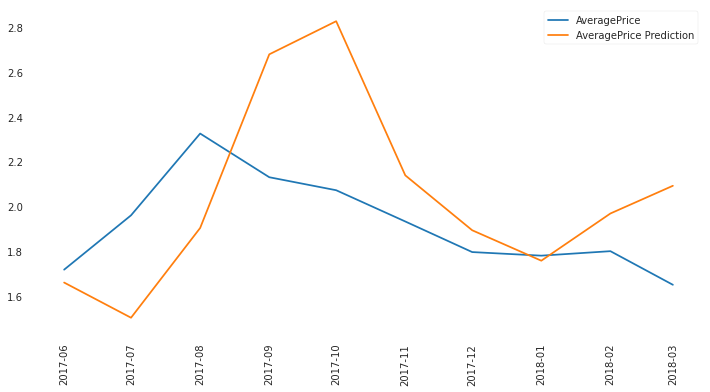

In [ ]:
plt.figure(figsize= (12,6))
plt.plot(test,label = 'AveragePrice')
plt.plot(future_forecast,label = 'AveragePrice Prediction')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

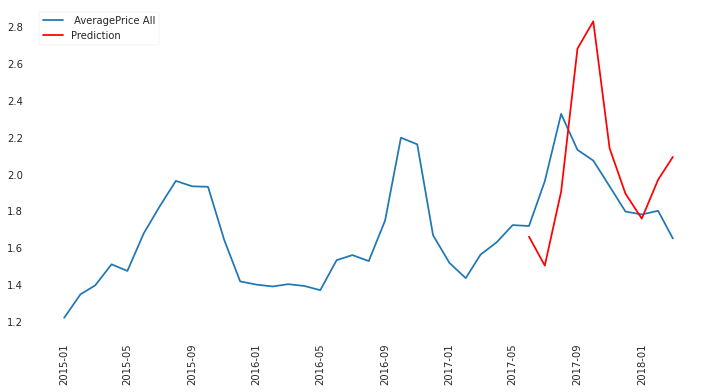

In [ ]:
plt.figure(figsize = (12,6))
plt.plot (df_ts1, label = ' AveragePrice All')
plt.plot (future_forecast , label = 'Prediction', color = 'red')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

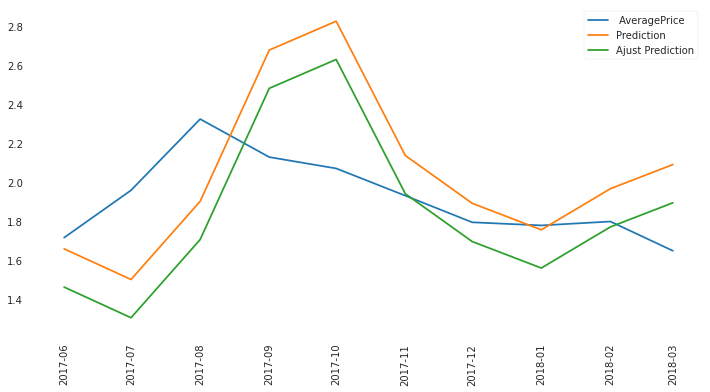

In [ ]:
plt.figure(figsize = (12,6))
plt.plot (test, label = ' AveragePrice')
plt.plot (future_forecast , label = 'Prediction')
plt.plot (future_forecast-0.5*rmse , label = 'Ajust Prediction')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

Vì độ tăng giảm không đồng đều nên chưa tìm được giá trị thích nghi

# **Dự đoán giá trong 12 tháng kế tiếp**



In [ ]:
future_forecast_12 = stepwise_model.predict(n_periods=len(test)+12)
future_forecast_12

array([1.65996225, 1.50298145, 1.90355098, 2.6784512 , 2.82627749,
       2.13837159, 1.89333982, 1.75750785, 1.96823629, 2.09182502,
       2.26755346, 2.14132943, 2.02224768, 1.77517695, 2.30642926,
       3.31755367, 3.59841975, 2.7690936 , 2.45492304, 2.28085524,
       2.55181822, 2.7159998 ])

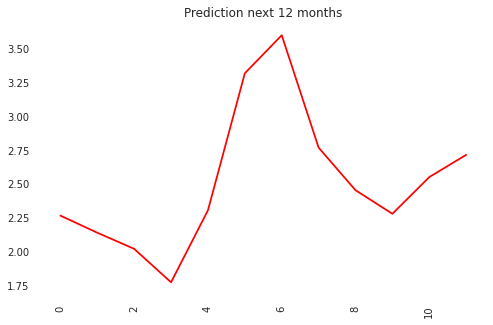

In [ ]:
plt.figure(figsize= (8,5))
plt.plot(future_forecast_12[len(test):], color = 'red', label ='Prediction' )
plt.xticks(rotation = 'vertical')
plt.title('Prediction next 12 months')
plt.show()

In [ ]:
test.tail()

,y
ds,
2017-11-01,1.9325
2017-12-01,1.7960
2018-01-01,1.7800
2018-02-01,1.8000
2018-03-01,1.6500


In [ ]:
future_forecast_12[len(test):]

array([2.26755346, 2.14132943, 2.02224768, 1.77517695, 2.30642926,
       3.31755367, 3.59841975, 2.7690936 , 2.45492304, 2.28085524,
       2.55181822, 2.7159998 ])

In [ ]:
months = pd.date_range('2018-04-01','2019-03-01', freq= 'MS').strftime('%Y-%m-%d').tolist()

In [ ]:
new_predict = pd.DataFrame({'ds':months , 'y': future_forecast_12[len(test):]})
new_predict

,ds,y
0,2018-04-01,2.267553
1,2018-05-01,2.141329
2,2018-06-01,2.022248
3,2018-07-01,1.775177
4,2018-08-01,2.306429
5,2018-09-01,3.317554
6,2018-10-01,3.598420
7,2018-11-01,2.769094
8,2018-12-01,2.454923
9,2019-01-01,2.280855


Bởi vì bộ dữ liệu nhỏ (khoảng 3 năm) , việc dự đoán chưa chính xác, mae cao

Thử phương pháp khác



# **Prophet**



In [ ]:
train = df_ts.drop(df_ts.index[-10:])
train.tail()

,ds,y
24,2017-01-01,1.5180
25,2017-02-01,1.4350
26,2017-03-01,1.5625
27,2017-04-01,1.6300
28,2017-05-01,1.7225


In [ ]:
test = df_ts.drop(df_ts.index[0:-10])
test

,ds,y
29,2017-06-01,1.7175
30,2017-07-01,1.9600
31,2017-08-01,2.3250
32,2017-09-01,2.1300
33,2017-10-01,2.0720
34,2017-11-01,1.9325
35,2017-12-01,1.7960
36,2018-01-01,1.7800
37,2018-02-01,1.8000
38,2018-03-01,1.6500


**Build model**

In [ ]:
model = Prophet(yearly_seasonality=True, daily_seasonality=False , weekly_seasonality= False)

In [ ]:
model.fit(train)

INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [ ]:
#Tạo dataframe mới
months = pd.date_range('2017-06-01','2019-03-01',
                       freq = 'MS').strftime('%Y-%m-%d').tolist()
future = pd.DataFrame(months)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [ ]:
#Sử dụng model để predict
forecast = model.predict(future)

In [ ]:
forecast[['ds','yhat']].head(10)

,ds,yhat
0,2017-06-01,1.881961
1,2017-07-01,1.954895
2,2017-08-01,1.981544
3,2017-09-01,2.118380
4,2017-10-01,2.410878
5,2017-11-01,2.283110
6,2017-12-01,1.880950
7,2018-01-01,1.714532
8,2018-02-01,1.724829
9,2018-03-01,1.843153


In [ ]:
#Tính RMSE,MAE
y_test = test['y'].values
y_pred = forecast['yhat'].values[:10]
mea_p = mean_absolute_error(y_test,y_pred)
print('MAE: %.3f' %mea_p)

MAE: 0.163


In [ ]:
rmse_p = sqrt(mean_squared_error(y_test,y_pred))
print('RMSE: %.3f' %rmse_p)

RMSE: 0.209


Kết quả khi dùng prophet cho MAE và RMSE tốt hơn ARIMA, giá dự đoán so với giá trung bình lệch khoảng 10% ( 20% khi sử dụng ARIMA)

=> Sử dụng Prophet

In [ ]:
y_test

array([1.7175, 1.96  , 2.325 , 2.13  , 2.072 , 1.9325, 1.796 , 1.78  ,
       1.8   , 1.65  ])

In [ ]:
y_pred

array([1.88196075, 1.95489509, 1.98154393, 2.11837971, 2.41087761,
       2.28311004, 1.88094986, 1.71453189, 1.72482912, 1.84315262])

In [ ]:
y_test_value = pd.DataFrame(y_test,index = pd.to_datetime(test['ds']),columns=['Actual'])
y_pred_value = pd.DataFrame(y_pred,index = pd.to_datetime(test['ds']),columns=['Prediction'])

In [ ]:
y_test_value

,Actual
ds,
2017-06-01,1.7175
2017-07-01,1.9600
2017-08-01,2.3250
2017-09-01,2.1300
2017-10-01,2.0720
2017-11-01,1.9325
2017-12-01,1.7960
2018-01-01,1.7800
2018-02-01,1.8000


In [ ]:
y_pred_value

,Prediction
ds,
2017-06-01,1.881961
2017-07-01,1.954895
2017-08-01,1.981544
2017-09-01,2.118380
2017-10-01,2.410878
2017-11-01,2.283110
2017-12-01,1.880950
2018-01-01,1.714532
2018-02-01,1.724829


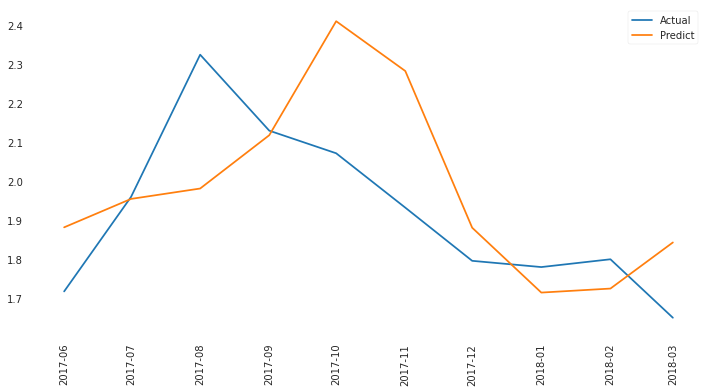

In [ ]:
#Trực quan hóa
plt.figure(figsize= (12,6))
plt.plot(y_test_value, label = 'Actual')
plt.plot(y_pred_value,label = 'Predict')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

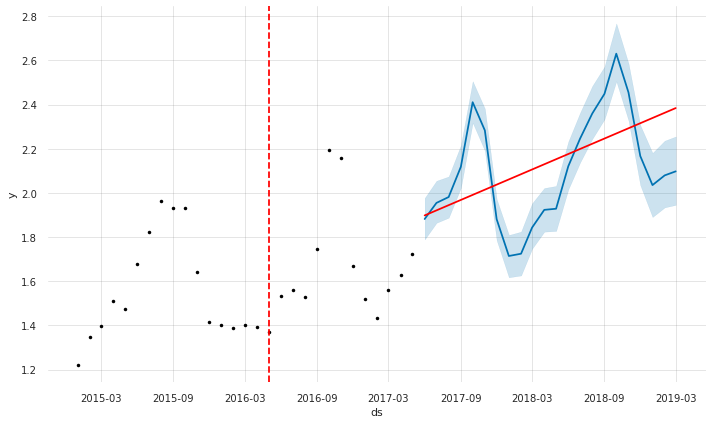

In [ ]:
fig = model.plot(forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(),model,forecast)

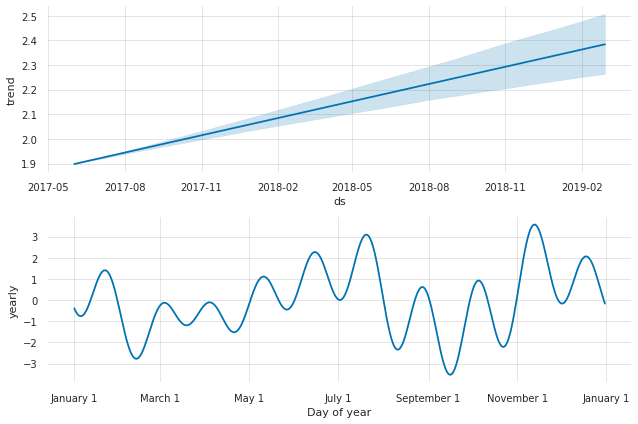

In [ ]:
fig1 = model.plot_components(forecast)
fig1.show()

**Dự đoán cho 12 tháng kế tiếp**

In [ ]:
forecast[['ds','yhat']].tail(12)

,ds,yhat
10,2018-04-01,1.923462
11,2018-05-01,1.928491
12,2018-06-01,2.120709
13,2018-07-01,2.246075
14,2018-08-01,2.359688
15,2018-09-01,2.448747
16,2018-10-01,2.630615
17,2018-11-01,2.455103
18,2018-12-01,2.167083
19,2019-01-01,2.035512


# **Thử dự đoán cho 5 năm tiếp theo**

In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=False , weekly_seasonality= False)
m.fit(df_ts)
future = m.make_future_dataframe(periods = 12*5, freq ='M') 


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
87,2022-03-31,2.506902,2.325161,2.691638,2.696619,2.580665,2.815495
88,2022-04-30,2.329192,2.145690,2.519736,2.711244,2.593155,2.832910
89,2022-05-31,2.532630,2.352545,2.719696,2.726357,2.605235,2.850426
90,2022-06-30,2.855966,2.664701,3.054942,2.740981,2.616799,2.868765
91,2022-07-31,3.295002,3.092695,3.490334,2.756094,2.627094,2.887903
92,2022-08-31,3.164768,2.961784,3.358554,2.771206,2.638206,2.908170
93,2022-09-30,2.911124,2.692706,3.110039,2.785831,2.648363,2.928179
94,2022-10-31,2.574144,2.365111,2.764284,2.800944,2.657804,2.947095
95,2022-11-30,2.736732,2.519486,2.924100,2.815569,2.671177,2.966629
96,2022-12-31,2.715594,2.506631,2.937142,2.830681,2.683201,2.986764


In [ ]:
forecast.shape

(99, 16)

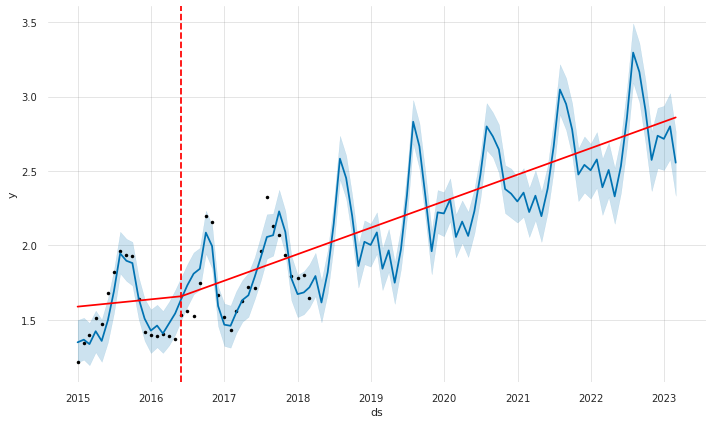

In [ ]:
fig = m.plot(forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(),m,forecast)

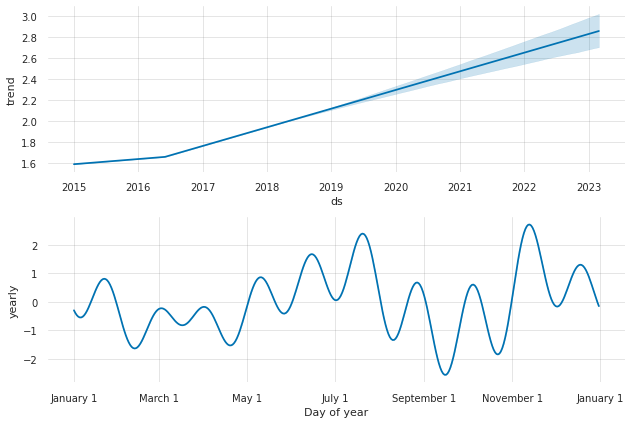

In [ ]:
fig1 = m.plot_components(forecast)
fig1.show()

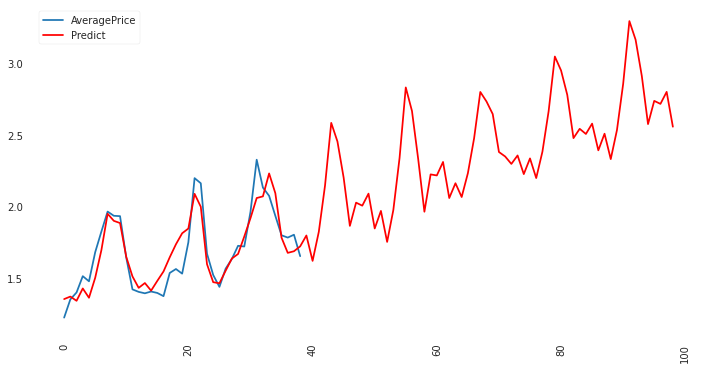

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df_ts['y'],label = 'AveragePrice')
plt.plot(forecast['yhat'],label = 'Predict',color ='red')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

Nhận xét : Biểu đồ khá là khớp nhau. Có khả năng mở rộng trồng trọt bơ organic tại California


Áp dụng tương tự cho bơ conventional và các bang khác